In [1]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunc as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot, generate_starting_point

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = "./matrix/"

In [4]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

# Experiments on Matrix M1

In [5]:
f = nf.Norm(M1)

In [6]:
x0 = generate_starting_point(f.dim)

In [7]:
norm = la.norm(M1, ord=2) ** 2

In [8]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

[start]
iteration 1, f(x) = 752.1482, ||gradient(f(x))|| = 1306.486986, alpha=0.1141, rate=0.0000
iteration 2, f(x) = 894.3600, ||gradient(f(x))|| = 195.311571, alpha=0.3200, rate=0.4808
iteration 3, f(x) = 949.3521, ||gradient(f(x))|| = 45.272329, alpha=0.6478, rate=0.4553
iteration 4, f(x) = 969.1798, ||gradient(f(x))|| = 14.282481, alpha=0.9645, rate=0.5373
iteration 5, f(x) = 979.7031, ||gradient(f(x))|| = 11.536893, alpha=1.6106, rate=0.6895
iteration 6, f(x) = 994.6927, ||gradient(f(x))|| = 7.170356, alpha=3.2072, rate=0.7610
iteration 7, f(x) = 1004.7595, ||gradient(f(x))|| = 2.297475, alpha=3.4629, rate=0.5528
iteration 8, f(x) = 1009.3260, ||gradient(f(x))|| = 0.707652, alpha=4.4854, rate=0.4566
iteration 9, f(x) = 1011.5274, ||gradient(f(x))|| = 0.308239, alpha=6.7475, rate=0.4602
iteration 10, f(x) = 1012.6020, ||gradient(f(x))|| = 0.104623, alpha=7.3471, rate=0.4345
iteration 11, f(x) = 1013.0223, ||gradient(f(x))|| = 0.035931, alpha=8.2524, rate=0.3647
iteration 12, f(x) =

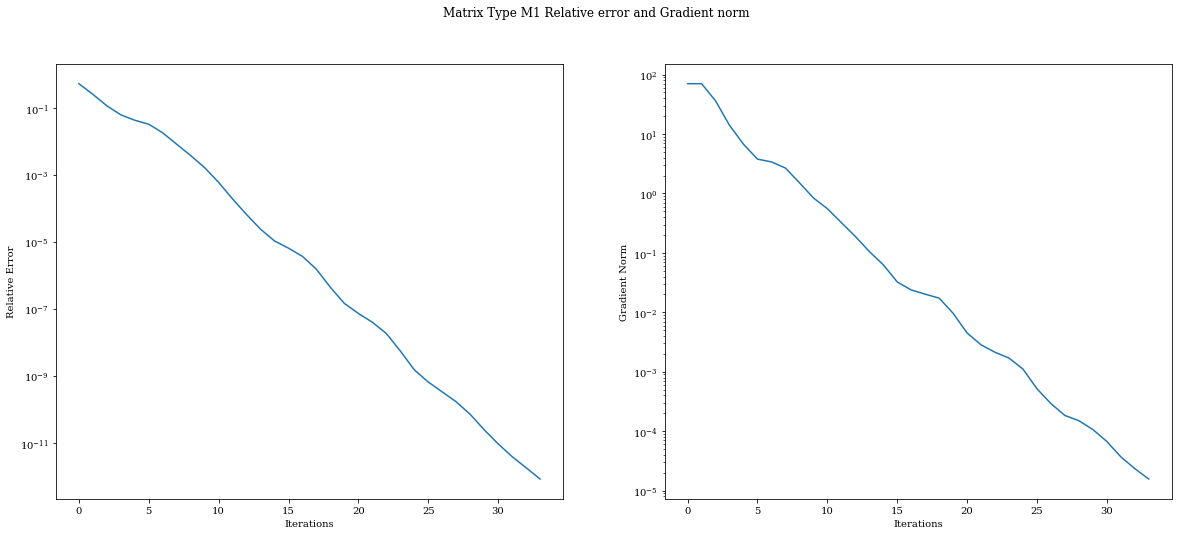

In [9]:
make_plot(gradientsCG, errorsCG, plot_path='CG-PR/', type='M1')

In [10]:
%%timeit -r 100 -n 10
f = nf.Norm(M1)
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = False)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

KeyboardInterrupt: 

In [17]:
from scipy.optimize import minimize

In [21]:
%%timeit -r 100 -n 10
res = minimize(f.func_value, x0, method='CG', jac=f.func_grad, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

4.83 ms ± 1.14 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M2

In [10]:
errorsCG = []
gradientsCG = []

In [11]:
f = nf.Norm(M2)

In [12]:
x0 = generate_starting_point(f.dim)

In [13]:
norm = la.norm(M2, ord=2) ** 2

In [14]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2394.3814, ||gradient(f(x))|| = 4571.996407, alpha=0.0252, rate=0.0000
iteration 2, f(x) = 2499.5967, ||gradient(f(x))|| = 1475.621637, alpha=0.0551, rate=0.4820
iteration 3, f(x) = 2561.2227, ||gradient(f(x))|| = 575.231749, alpha=0.1007, rate=0.5764
iteration 4, f(x) = 2593.3059, ||gradient(f(x))|| = 155.760952, alpha=0.1305, rate=0.5695
iteration 5, f(x) = 2606.6853, ||gradient(f(x))|| = 48.149674, alpha=0.1899, rate=0.6064
iteration 6, f(x) = 2613.9345, ||gradient(f(x))|| = 35.122171, alpha=0.3275, rate=0.7293
iteration 7, f(x) = 2621.5074, ||gradient(f(x))|| = 34.256632, alpha=0.4892, rate=0.7989
iteration 8, f(x) = 2630.9184, ||gradient(f(x))|| = 17.716276, alpha=0.6879, rate=0.7371
iteration 9, f(x) = 2636.8943, ||gradient(f(x))|| = 7.414073, alpha=0.8123, rate=0.5567
iteration 10, f(x) = 2640.5419, ||gradient(f(x))|| = 2.445744, alpha=1.1332, rate=0.4944
iteration 11, f(x) = 2642.1108, ||gradient(f(x))|| = 0.611709, alpha=1.3958, rate=0.3758
iteratio

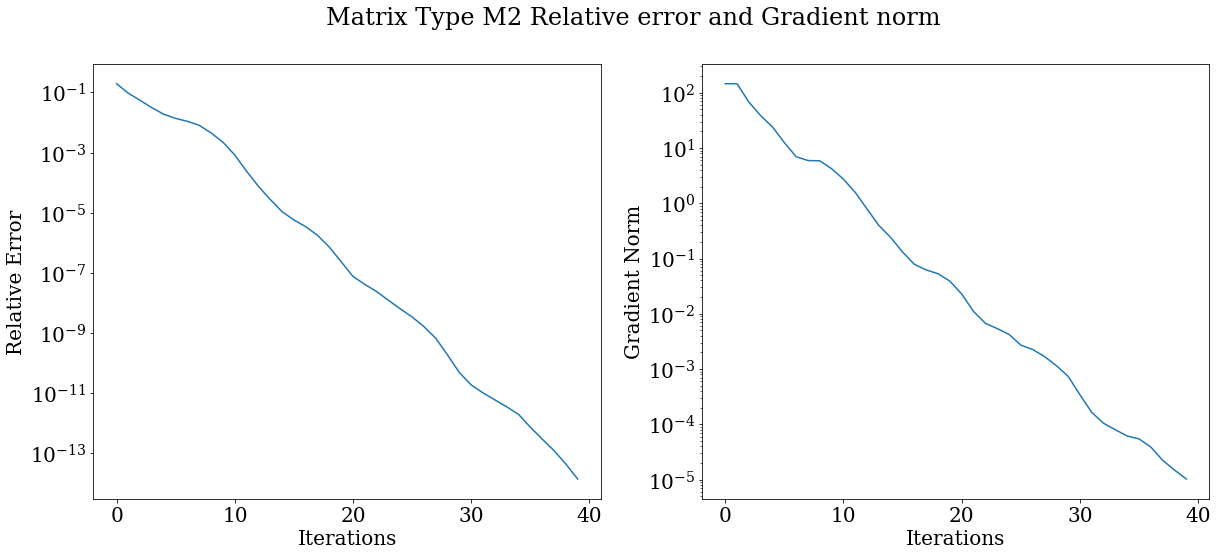

In [15]:
make_plot(gradientsCG, errorsCG, plot_path='CG-PR/', type='M2')

In [16]:
%%timeit -r 100 -n 10
f = nf.Norm(M2)
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = False)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

4.53 ms ± 351 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [17]:
from scipy.optimize import minimize

In [45]:
%%timeit -r 100 -n 10
res = minimize(f.func_value, x0, method='CG', jac=f.func_grad, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

2.8 ms ± 188 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M3

In [5]:
errorsCG = []
gradientsCG = []

In [6]:
f = nf.Norm(M3)

In [7]:
x0 = generate_starting_point(f.dim)

In [8]:
norm = la.norm(M3, ord=2) ** 2

In [22]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

[start]
iteration 1, f(x) = 590.8452, ||gradient(f(x))|| = 386.785396, alpha=0.1009, rate=0.0000
iteration 2, f(x) = 630.0637, ||gradient(f(x))|| = 104.880664, alpha=0.2743, rate=0.5663
iteration 3, f(x) = 653.9041, ||gradient(f(x))|| = 31.418416, alpha=0.5736, rate=0.5461
iteration 4, f(x) = 667.5844, ||gradient(f(x))|| = 9.638913, alpha=1.0736, rate=0.4948
iteration 5, f(x) = 672.9624, ||gradient(f(x))|| = 2.514932, alpha=1.2641, rate=0.4142
iteration 6, f(x) = 675.0756, ||gradient(f(x))|| = 0.961847, alpha=1.8097, rate=0.4440
iteration 7, f(x) = 676.2045, ||gradient(f(x))|| = 0.462401, alpha=2.4858, rate=0.5079
iteration 8, f(x) = 676.7097, ||gradient(f(x))|| = 0.161511, alpha=2.2637, rate=0.4823
iteration 9, f(x) = 676.9233, ||gradient(f(x))|| = 0.092021, alpha=2.6968, rate=0.5198
iteration 10, f(x) = 677.1067, ||gradient(f(x))|| = 0.064816, alpha=4.0687, rate=0.6093
iteration 11, f(x) = 677.1885, ||gradient(f(x))|| = 0.024784, alpha=2.5498, rate=0.4493
iteration 12, f(x) = 677.226

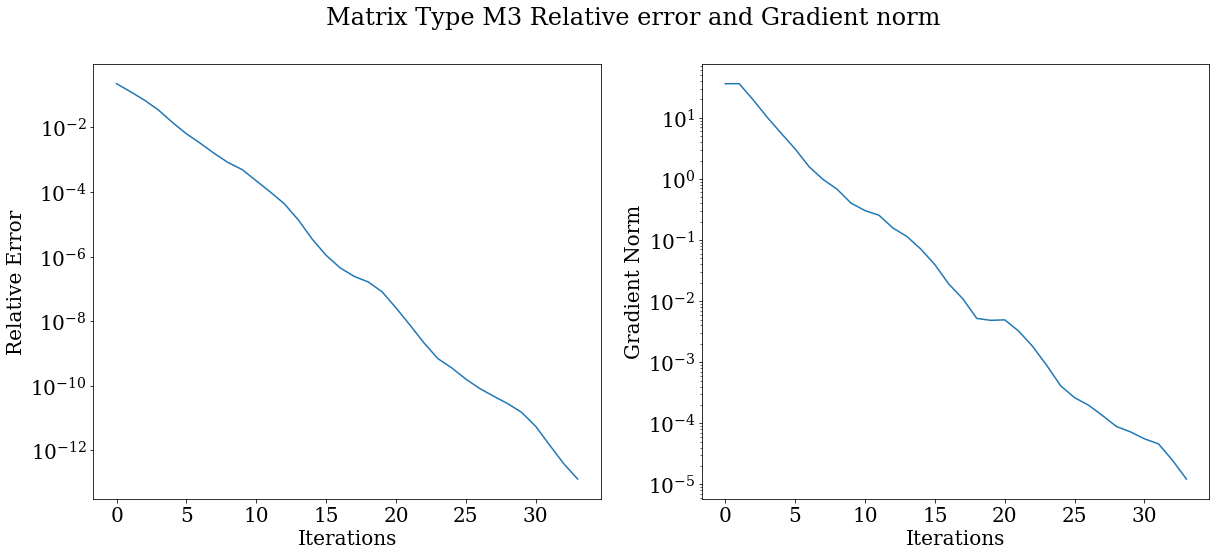

In [23]:
make_plot(gradientsCG, errorsCG, plot_path='CG-PR/', type='M3')

In [37]:
%%timeit -r 100 -n 10
f = nf.Norm(M3)
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = False)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

iteration 12, f(x) = 677.2559, ||gradient(f(x))|| = 0.000197, alpha=4.1868, rate=0.3102
iteration 13, f(x) = 677.2563, ||gradient(f(x))|| = 0.000044, alpha=3.9644, rate=0.2952
iteration 14, f(x) = 677.2564, ||gradient(f(x))|| = 0.000012, alpha=3.2697, rate=0.2428
iteration 15, f(x) = 677.2564, ||gradient(f(x))|| = 0.000005, alpha=3.7859, rate=0.4230
optimal value reached
[end]
[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.261

iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.2559, ||gradient(f(x))|| = 0.000197, alpha=4.1868, rate=0.3102
iteration 13, f(x) = 677.2563, ||gradient(f(x))|| = 0.000044, alpha=3.9644, rate=0.2952
iteration 14, f(x) = 677.2564, ||gradient(f(x))|| = 0.000012, alpha=3.2697, rate=0.2428
iteration 15, f(x) = 677.2564, ||gradient(f(x))|| = 0.000005, alpha=3.7859, rate=0.4230
optimal value reached
[end]
[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.63

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.2559, ||gradient(f(x))|| = 0.000197, alpha=4.1868, rate=0.3102
iteration 13, f(x) = 677.2563, ||grad

iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.2559, ||gradient(f(x))|| = 0.000197, alpha=4.1868, rate=0.3102
iteration 13, f(x) = 677.2563, ||gradient(f(x))|| = 0.000044, alpha=3.9644, rate=0.2952
iteration 14, f(x) = 677.2564, ||gradient(f(x))|| = 0.000012, alpha=3.2697, rate=0.2428
iteration 15, f(x) = 677.2564, ||gradient(f(x))|| = 0.000005, alpha=3.7859, rate=0.4230
optimal value reached
[end]
[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

[start]
iteration 1, f(x) = 577.0285, ||gradient(f(x))|| = 292.356331, alpha=0.1203, rate=0.0000
iteration 2, f(x) = 613.9218, ||gradient(f(x))|| = 105.293804, alpha=0.3363, rate=0.6316
iteration 3, f(x) = 650.8360, ||gradient(f(x))|| = 25.625285, alpha=1.0844, rate=0.6319
iteration 4, f(x) = 667.6390, ||gradient(f(x))|| = 6.464332, alpha=1.6247, rate=0.4172
iteration 5, f(x) = 675.0069, ||gradient(f(x))|| = 1.209206, alpha=2.5925, rate=0.3640
iteration 6, f(x) = 676.6682, ||gradient(f(x))|| = 0.184158, alpha=2.8925, rate=0.2339
iteration 7, f(x) = 677.0648, ||gradient(f(x))|| = 0.072400, alpha=4.3938, rate=0.2615
iteration 8, f(x) = 677.2024, ||gradient(f(x))|| = 0.021079, alpha=3.8360, rate=0.3258
iteration 9, f(x) = 677.2411, ||gradient(f(x))|| = 0.004767, alpha=3.6765, rate=0.2818
iteration 10, f(x) = 677.2508, ||gradient(f(x))|| = 0.001775, alpha=4.0801, rate=0.2845
iteration 11, f(x) = 677.2547, ||gradient(f(x))|| = 0.000589, alpha=4.3865, rate=0.3673
iteration 12, f(x) = 677.255

In [9]:
from scipy.optimize import minimize

In [40]:
%%timeit -r 100 -n 10
res = minimize(f.func_value, x0, method='CG', jac=f.func_grad, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

2.79 ms ± 325 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M4

In [17]:
errorsCG = []
gradientsCG = []

In [18]:
f = nf.Norm(M4)

In [19]:
x0 = generate_starting_point(f.dim)

In [20]:
norm = la.norm(M4, ord=2) ** 2

In [21]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2089.9616, ||gradient(f(x))|| = 12.437818, alpha=6.5784, rate=0.0000
iteration 2, f(x) = 2320.2404, ||gradient(f(x))|| = 2.786680, alpha=41.6168, rate=0.2157
iteration 3, f(x) = 2469.0413, ||gradient(f(x))|| = 0.879837, alpha=144.1487, rate=0.5892
iteration 4, f(x) = 2556.4339, ||gradient(f(x))|| = 0.241825, alpha=260.7997, rate=0.5495
iteration 5, f(x) = 2580.1232, ||gradient(f(x))|| = 0.198635, alpha=215.4178, rate=0.5184
iteration 6, f(x) = 2603.0163, ||gradient(f(x))|| = 0.058192, alpha=259.1191, rate=0.7482
iteration 7, f(x) = 2621.1018, ||gradient(f(x))|| = 0.029202, alpha=725.1587, rate=0.6748
iteration 8, f(x) = 2627.4240, ||gradient(f(x))|| = 0.024028, alpha=468.3054, rate=0.6193
iteration 9, f(x) = 2637.2391, ||gradient(f(x))|| = 0.009431, alpha=946.4620, rate=0.7851
iteration 10, f(x) = 2642.7768, ||gradient(f(x))|| = 0.008437, alpha=1330.6664, rate=0.5750
iteration 11, f(x) = 2646.0697, ||gradient(f(x))|| = 0.002325, alpha=851.1058, rate=0.5830
i

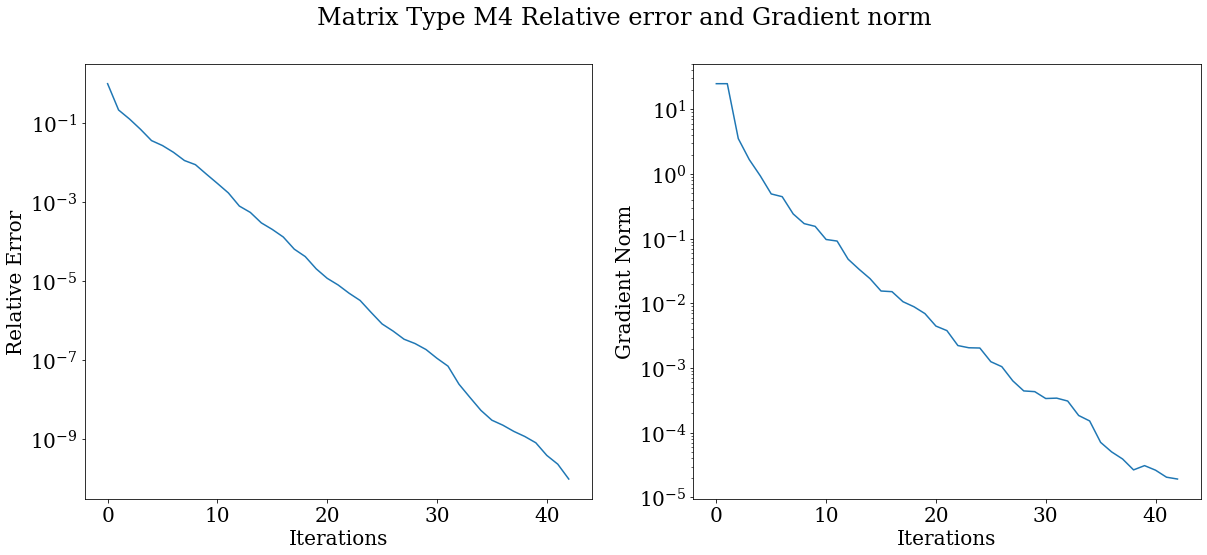

In [22]:
make_plot(gradientsCG, errorsCG, plot_path='CG-PR/', type='M4')

In [53]:
%%timeit -r 100 -n 10
f = nf.Norm(M4)
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = False)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

KeyboardInterrupt: 

In [ ]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_value, x0, method='CG', jac=f.func_grad, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

# Experiments on Matrix M5

In [10]:
errorsCG = []
gradientsCG = []

In [11]:
f = nf.Norm(M5)

In [12]:
x0 = generate_starting_point(f.dim)

In [13]:
norm = la.norm(M5, ord=2) ** 2

In [13]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

[start]
iteration 1, f(x) = -62205.0215, ||gradient(f(x))|| = 80017.409394, alpha=0.2393, rate=0.0000
iteration 2, f(x) = -83734.4347, ||gradient(f(x))|| = 8855.189325, alpha=0.8249, rate=1.6064
iteration 3, f(x) = -90881.9374, ||gradient(f(x))|| = 2208.133054, alpha=1.8700, rate=1.1327
iteration 4, f(x) = -94040.0705, ||gradient(f(x))|| = 724.314933, alpha=3.2402, rate=1.0389
iteration 5, f(x) = -95913.7989, ||gradient(f(x))|| = 419.006010, alpha=5.9044, rate=1.0165
iteration 6, f(x) = -97321.5271, ||gradient(f(x))|| = 204.730970, alpha=7.8791, rate=1.0097
iteration 7, f(x) = -98408.8952, ||gradient(f(x))|| = 107.822356, alpha=12.7023, rate=1.0072
iteration 8, f(x) = -99168.6518, ||gradient(f(x))|| = 46.986038, alpha=16.6929, rate=1.0055
iteration 9, f(x) = -99625.8012, ||gradient(f(x))|| = 13.879545, alpha=22.2971, rate=1.0038
iteration 10, f(x) = -99781.0719, ||gradient(f(x))|| = 4.300383, alpha=23.9304, rate=1.0023
iteration 11, f(x) = -99852.3568, ||gradient(f(x))|| = 2.395705, al

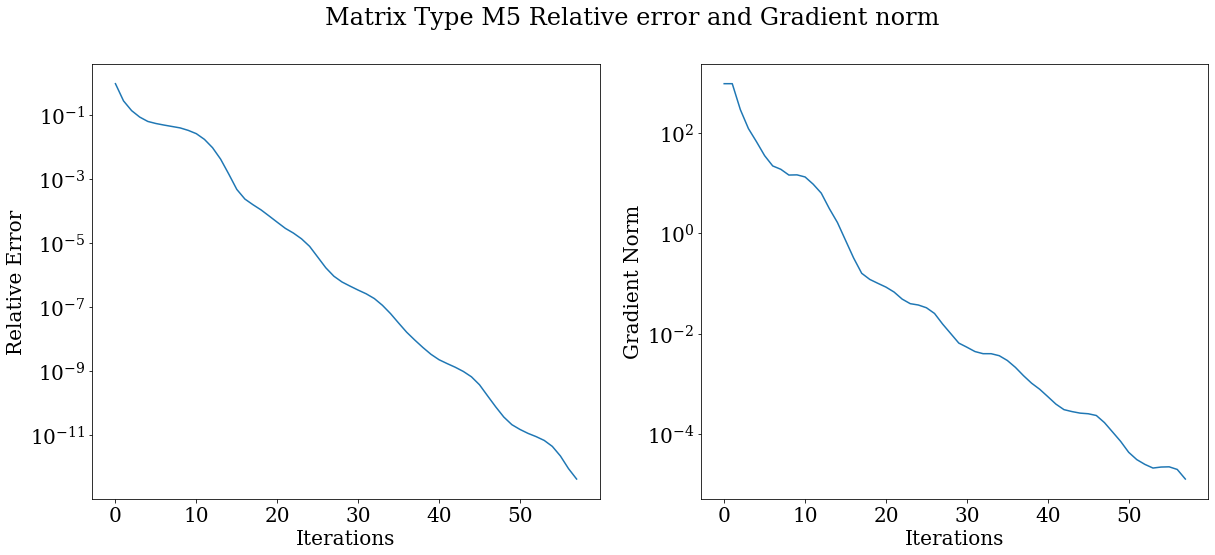

In [16]:
make_plot(gradientsCG, errorsCG, plot_path='CG-PR/', type='M5')

In [66]:
%%timeit -r 100 -n 10
f = nf.Norm(M5)
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = False)
gradientsCG, normsCG, errorsCG = optimizerCG.run(500)

21.9 ms ± 3.52 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [14]:
from scipy.optimize import minimize

In [68]:
%%timeit -r 100 -n 10
res = minimize(f.func_value, x0, method='CG', jac=f.func_grad, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

21.1 ms ± 3.31 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)
